In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
save_dir = "with_shield"
events_in_this_sim = 190.0e6
livetime = (events_in_this_sim/50.0e6)*21.8
print('Total livetime = %0.3f sec'%(livetime))

Total livetime = 82.840 sec


In [3]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
inFile_k100 = '%s/sim_190M_PuBe_sourceAndshields_boronBox_walls_floor_boronShield_V6H6_1inch_withFlags.root'%(dir_)


file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

EV = tree_k100["EV"].array(library="np")
EV = EV - 1
Type = tree_k100["Type"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
DT = tree_k100["DT"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")
time1 = tree_k100["time1"].array(library="np")

k100 = pd.DataFrame( {'EV' : EV,
                  'Type' : Type,
                  'E1' : E1,
                  'D3' : D3,
                      'DT' : DT,
                     'nCap' : nCap,
                     'time1' : time1}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100['TS'] = tree_k100["TS"].array(library="np")
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3..."
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2..."
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]"
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800..."
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600..."


In [4]:
def Eneutron(df_):
    if(df_.flag == 0):
        return -1
    else:
        index = np.where(df_.nCap ==1)[0][0]
        return (df_.E1)[index]

In [5]:
def nCap_isoTope(df_):
    if(df_.flag == 0):
        if(76 in ([int(i*10) for i in (df_.Egamma)])):
            return 57026
        else:
            return -1
    else:
        index = np.where(df_.nCap ==1)[0][0]
        return (df_.Type)[index+1]

In [9]:
def Egamma(df_):
    indices = np.where(df_.Type == 22)[0]
    energy = []
    gammas = {}
    for i in indices:
        #print(df_.TS)
        track = int((df_.TS)[i]/1e5)
        if(not (track in gammas)):
            gammas[track] = 'yolo'+str(track)
            energy.append((df_.E1)[i])
    return energy

In [6]:
k100['Eneutron'] = k100.apply(Eneutron,axis=1)

In [10]:
k100['Egamma'] = k100.apply(Egamma,axis=1)

In [11]:
k100['nCapType'] = k100.apply(nCap_isoTope,axis=1)

In [12]:
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS,Eneutron,Egamma,nCapType
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3...",-1.0,"[0.47759342, 0.00421604, 0.0283065]",-1
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2...",-1.0,[0.1727997],-1
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]",-1.0,[2.223048],-1
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800...",-1.0,"[0.477602, 0.0286095]",-1
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600...",-1.0,[0.7827267],-1


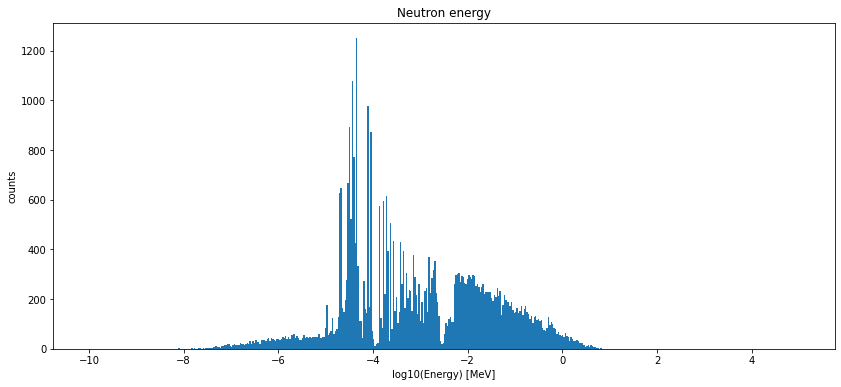

In [13]:

Eneutron = np.log10(k100[k100.nCapType == 128053].Eneutron)

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(Eneutron,bins=500, range=[-10,5])

plt.xlabel('log10(Energy) [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("Neutron energy")
   

plt.show()